In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df = pd.read_csv("data/medical_insurance.csv")

In [5]:
df.head()

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [8]:
print("\nخلاصه آماری:")
print(df.describe())


خلاصه آماری:
               age          bmi     children      expenses      premium
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000
mean     39.207025    30.665471     1.094918  13270.422414   262.874685
std      14.049960     6.098382     1.205493  12110.011240   292.532178
min      18.000000    16.000000     0.000000   1121.870000    11.218700
25%      27.000000    26.300000     0.000000   4740.287500    87.354250
50%      39.000000    30.400000     1.000000   9382.030000   174.997400
75%      51.000000    34.700000     2.000000  16639.915000   342.908900
max      64.000000    53.100000     5.000000  63770.430000  1983.106400


In [9]:
# بررسی داده‌های گمشده
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 age                     0
gender                  0
bmi                     0
children                0
discount_eligibility    0
region                  0
expenses                0
premium                 0
dtype: int64


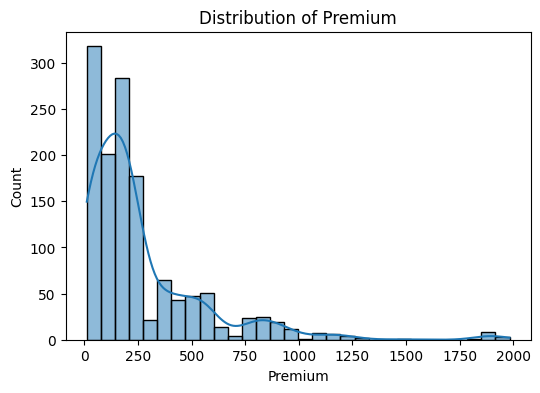

In [10]:
# توزیع متغیر هدف - premium
plt.figure(figsize=(6, 4))
sns.histplot(df['premium'], kde=True, bins=30)
plt.title("Distribution of Premium")
plt.xlabel("Premium")
plt.ylabel("Count")
plt.show()

## 📊 Analysis of the Premium Distribution (Histogram + KDE)

This plot shows the distribution of the target variable `premium` using a histogram along with a Kernel Density Estimation (KDE) curve.

---

### 🔍 Key Observations:

- **Right-Skewed Distribution:**  
  The distribution of `premium` is positively skewed, meaning that the majority of values are concentrated on the lower end of the scale.  
  A small number of records have much higher premium values, creating a long tail to the right.

- **High Frequency Range (Mode):**  
  Most values fall within the 0 to 200 range, as indicated by the tallest histogram bars and the peak of the KDE curve.  
  This suggests that most individuals in the dataset pay relatively low premiums.

- **Gradual Decline:**  
  As the premium value increases, the number of records decreases sharply.  
  This indicates that high-premium cases are rare in the dataset.

- **Presence of Outliers:**  
  There are a few records with extremely high premiums (e.g., above 1000), which appear as outliers in the far-right end of the distribution.  
  These may correspond to individuals with high risk or without discount eligibility.

- **KDE Curve Insights:**  
  The blue KDE line provides a smoothed estimate of the distribution, reinforcing the positive skew and highlighting the density of lower premium values.

---

### 🛠 Implications for Modeling:

- Consider applying a **logarithmic transformation** on the `premium` variable to normalize the distribution and improve model performance.
- Investigate and decide whether to retain or handle **outliers**, depending on their influence on the regression model.


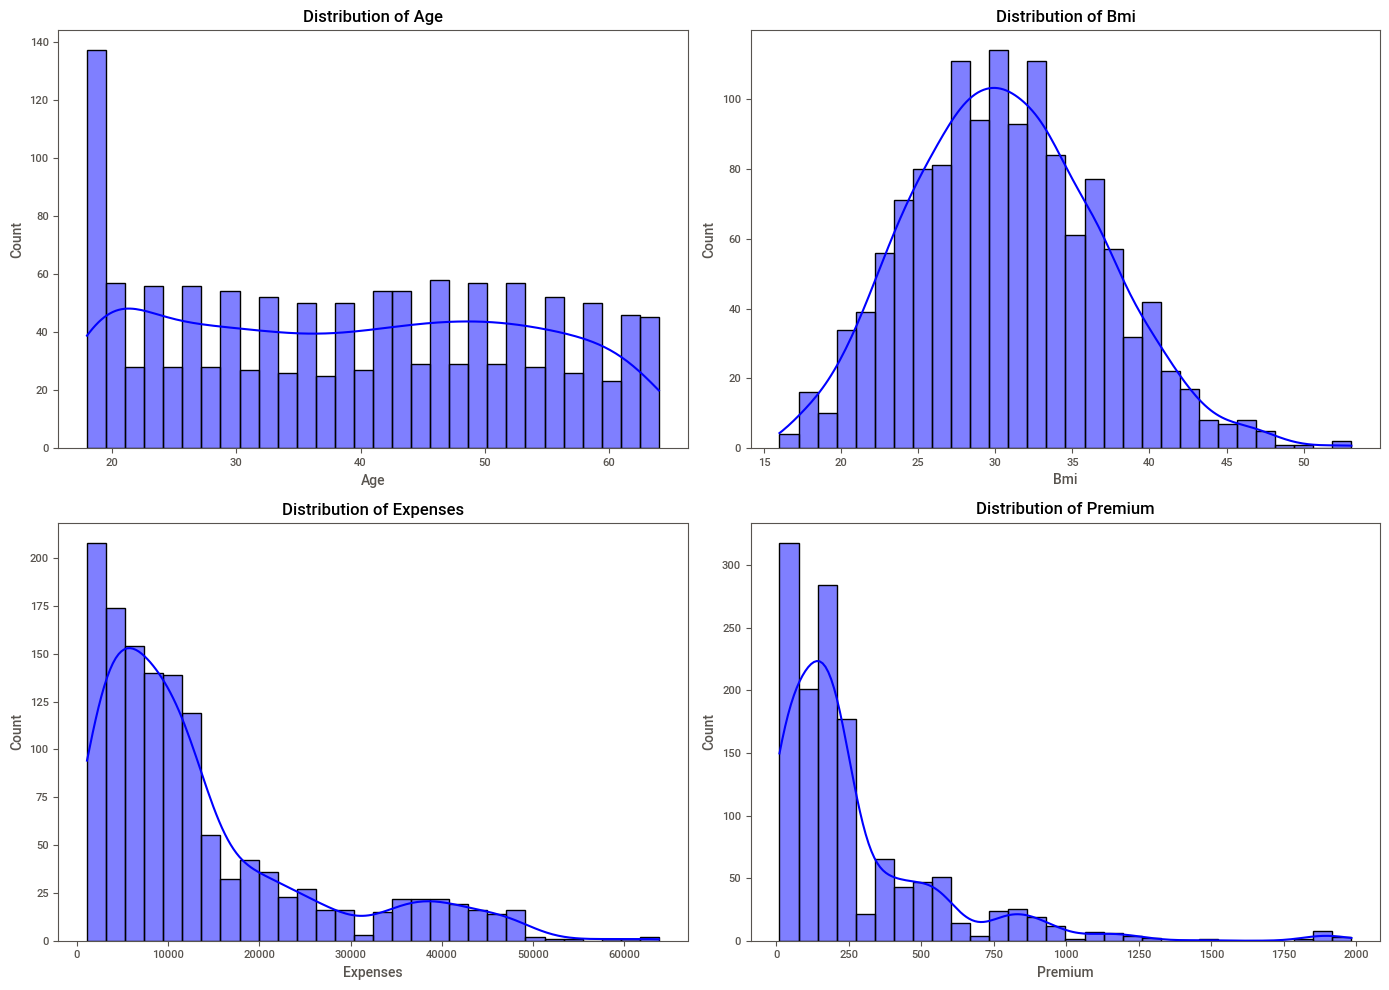

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# تعیین ویژگی‌ها
features = ['age', 'bmi', 'expenses', 'premium']

# تنظیم اندازه کلی نمودارها
plt.figure(figsize=(14, 10))

# رسم هر نمودار در یک subplot جداگانه
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


## 📊 Distribution Analysis of Key Variables

### 1. Distribution of **Age**
- The age histogram shows the distribution of individuals across different age groups.
- The highest concentration of data is observed around the **age of 20**.
- After that, the distribution continues relatively evenly between **20 and 60 years old**.
- This indicates that the dataset has a younger demographic, but middle-aged groups are also well represented.

---

### 2. Distribution of **BMI** (Body Mass Index)
- The shape of the histogram is approximately **bell-shaped or normal**.
- Most individuals have a BMI in the mid-range (around **30**).
- Very low or very high BMI values are relatively rare.
- This pattern suggests that most individuals fall in the normal to overweight category.

---

### 3. Distribution of **Expenses**
- The highest data density is seen in values **below 5000**.
- The distribution is **right-skewed**, meaning a small number of individuals incur very high expenses.
- This implies that **a few outliers with high medical costs** significantly impact the distribution.
- It highlights the influence of risk factors or health conditions on increasing expenses.

---

### 4. Distribution of **Premium**
- The premium distribution follows a similar pattern to expenses: **high frequency in low values**.
- Most insured individuals pay premiums around **250**.
- It is also **right-skewed**, showing that **only a small fraction pay high premium amounts**.
- This could influence insurance company policies, especially in pricing and risk evaluation.

---

📌 **Summary**  
All four variables exhibit specific distribution patterns that are important for further analysis such as regression modeling or clustering. The `expenses` and `premium` variables are heavily skewed and may benefit from **normalization or logarithmic transformation** before applying machine learning models.


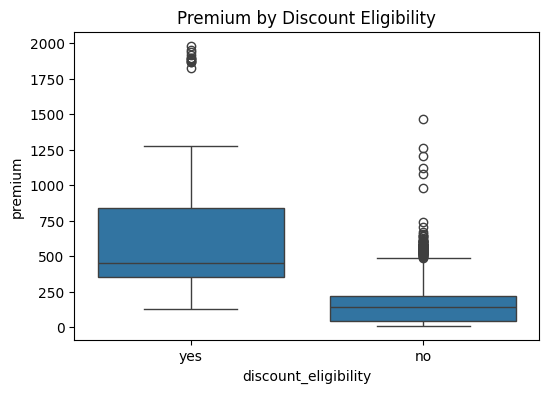

In [11]:
# بررسی boxplot حق بیمه بر اساس تخفیف
plt.figure(figsize=(6, 4))
sns.boxplot(x="discount_eligibility", y="premium", data=df)
plt.title("Premium by Discount Eligibility")
plt.show()

## 📊 Box Plot Analysis of "Premium" by "discount_eligibility"

The presented box plot compares the distribution of the **"Premium"** variable across two groups: those eligible for a discount (`yes`) and those not eligible (`no`). This visualization effectively highlights statistical differences between the two groups in relation to Premium amounts.

---

### ✅ 1. Group "yes" (Discount Eligible)

- The **median** premium for this group is around **500**, indicating a generally higher premium level.
- The **box** (interquartile range from Q1 to Q3) reflects a more **concentrated distribution** in a higher premium range.
- The **whiskers** extend to normal value ranges, but a **significant number of outliers** with very high premiums are clearly visible.
- This suggests that individuals paying higher premiums are often eligible for discounts — or conversely, that high premiums might have triggered eligibility for discounts.

---

### ✅ 2. Group "no" (Not Discount Eligible)

- The **median premium** in this group is notably **lower**, around **100–200**.
- The **interquartile range (IQR)** and overall premium range are significantly **smaller** than in the "yes" group.
- There are **fewer and less extreme outliers**, indicating more **homogeneity** in premium values for this group.

---

### 🧠 Conclusion

Overall, the **Premium** values for the `yes` (discount-eligible) group are **higher** on average than for the `no` group.

This difference may suggest:
- People with higher premiums are more likely to receive discounts.
- Or, the discount structure still results in relatively high final premiums after applying the discount.

The presence of **numerous high outliers** in the `yes` group suggests that some individuals have **exceptionally high premiums**, which may warrant further investigation — possibly based on health-related factors, age, or supplementary insurance options.


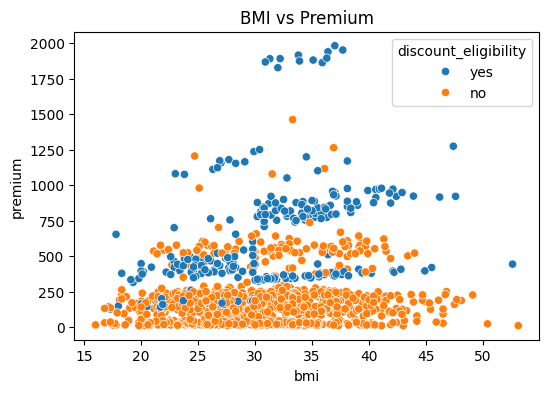

In [12]:
# بررسی رابطه بین BMI و Premium
plt.figure(figsize=(6, 4))
sns.scatterplot(x="bmi", y="premium", hue="discount_eligibility", data=df)
plt.title("BMI vs Premium")
plt.show()

### 📉 Scatter Plot: BMI vs Premium (Colored by Discount Eligibility)

This scatter plot visualizes the relationship between **Body Mass Index (BMI)** and **insurance premium**. Points are colored based on the individual's discount eligibility:
- 🔵 Blue = Discount eligible (`yes`)
- 🟠 Orange = Not eligible for discount (`no`)

---

#### 🔍 Key Insights:

1. **BMI and Premium Relationship:**
   - Generally, higher BMI is associated with higher premium values.
   - However, the relationship is not strictly linear — individuals with similar premiums can have very different BMI values.
   - This shows that BMI alone does not determine premium; other factors are also influential.

2. **Effect of Discount Eligibility:**
   - Discount-eligible individuals (`yes`) often have higher premiums.
   - Non-eligible individuals (`no`) tend to have lower premiums, particularly in the low-BMI range.

3. **Wide Spread at Low Premiums:**
   - Even at low premium levels (e.g., < 200), individuals with various BMI levels (15 to 45) are present.
   - This spread suggests low premium is not exclusive to low BMI — multiple features affect the outcome.

4. **Density of Data Points:**
   - Most individuals fall within the BMI range of 20–40.
   - This is where the highest concentration of observations is found.

5. **Outliers:**
   - A few individuals with very high premiums or extreme BMI values stand out as outliers.


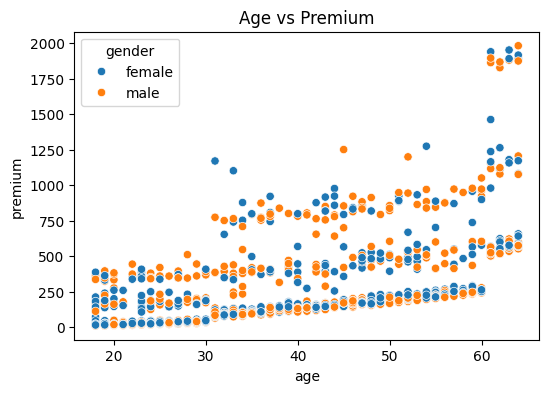

In [13]:
# بررسی رابطه بین Age و Premium
plt.figure(figsize=(6, 4))
sns.scatterplot(x="age", y="premium", hue="gender", data=df)
plt.title("Age vs Premium")
plt.show()

### 📊 Scatter Plot: Age vs Premium (Colored by Gender)

This scatter plot illustrates the relationship between **age** and **insurance premium**, with gender represented by color:
- 🔵 Blue: Female
- 🟠 Orange: Male

---

#### 🔍 Key Insights:

1. **Positive Correlation**:
   - Premium generally increases with age, with a steeper rise after age 50.

2. **Low Premiums for Younger Individuals**:
   - Individuals aged 18–30 mostly have premiums under 500.
   - Gender differences are minimal in this group.

3. **Wider Premium Spread with Age**:
   - Older individuals show greater variation in premium amounts, influenced by other risk factors.

4. **Gender Comparison**:
   - No major difference between males and females in premium distribution.
   - A few older females exhibit higher premiums.

5. **Outliers**:
   - Some individuals aged 60+ have extremely high premiums (up to 2000), indicating high-risk profiles.


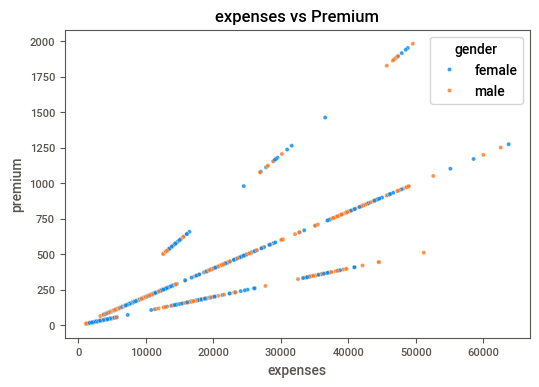

In [11]:

# بررسی رابطه بین expenses و Premium
plt.figure(figsize=(6, 4))
sns.scatterplot(x="expenses", y="premium", hue="gender", data=df , alpha=0.8 )
plt.title("expenses vs Premium")
plt.show()

## Analysis of the Scatter Plot: Expenses vs Premium

This scatter plot visualizes the relationship between **medical expenses** and **insurance premium**, with an additional color separation by **gender**.

### Key Observations:

1. **Positive Correlation:**
   There is a noticeable **positive linear relationship** between expenses and premium. In general, individuals with higher medical expenses tend to pay higher insurance premiums.

2. **Gender Differentiation:**
   - Blue dots: Females
   - Orange dots: Males

   Both genders follow a similar trend overall. However, in the **higher expense range (e.g., $50,000 to $60,000)**, **male entries appear more frequently**, possibly indicating gender-based risk assessment or usage patterns.

3. **Clustering Patterns:**
   Dense clusters of data points (e.g., around $10,000 to $15,000 in expenses) may suggest **grouped policy brackets** or standardized pricing segments.

4. **Outliers:**
   A few points deviate significantly from the main trend:
   - High expenses with low premiums
   - High premiums with relatively low expenses

   These may indicate **special discount cases, anomalies, or errors in data** that should be further investigated.


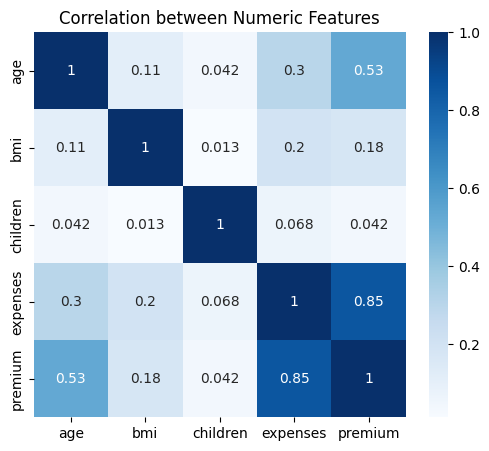

In [14]:
# بررسی همبستگی عددی
numeric_cols = ['age', 'bmi', 'children', 'expenses', 'premium']
plt.figure(figsize=(6, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation between Numeric Features")
plt.show()

## Correlation Analysis between Numeric Features

The heatmap above displays the **Pearson correlation coefficients** between the numeric features in the dataset: `age`, `bmi`, `children`, `expenses`, and `premium`.

### 🔍 Key Observations:

- **Expenses and Premium (0.85)**:  
  There is a **strong positive correlation** between insurance expenses and premium values. This implies that as the premium increases, the overall expenses tend to increase significantly as well. It makes sense, as higher premiums are usually associated with higher levels of coverage or risk.

- **Age and Premium (0.53)**:  
  There is a **moderate positive correlation** between age and premium. Older individuals are likely to be charged higher premiums due to increased health risks.

- **Age and Expenses (0.30)**:  
  A **weak to moderate positive correlation** indicates that expenses tend to increase slightly with age, though not as strongly as premium.

- **BMI and Other Features**:  
  BMI has a **weak correlation** with all other features (all < 0.2), indicating that it does not strongly influence expenses or premium in this dataset.

- **Children Feature**:  
  The number of children has **no significant correlation** with any other variable. This suggests that the number of dependents may not directly impact expenses or premium.

### 📌 Conclusion:
The premium is the most strongly correlated variable with expenses and age, which aligns with expectations in health insurance modeling. Features like `children` and `bmi` show very little to no linear correlation and might require nonlinear modeling techniques to capture their impact.



In [3]:
from scipy.stats import skew
from scipy import stats

df['expenses_log'] = np.log1p(df['expenses'])
df['expenses_boxcox'], _ = stats.boxcox(df['expenses'] + 1)  # +1 برای جلوگیری از صفر

# محاسبه skewness
print("Skew original:", skew(df['expenses']))
print("Skew log:", skew(df['expenses_log']))
print("Skew boxcox:", skew(df['expenses_boxcox']))


Skew original: 1.5141797167430497
Skew log: -0.08971647028062664
Skew boxcox: -0.008699149661987534


# preprocessing

In [15]:
# Encoding

import pandas as pd 
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # female=0, male=1
df['discount_eligibility'] = le.fit_transform(df['discount_eligibility']) # no=0, yes=1
df =pd.get_dummies(df, columns=['region'], drop_first=True)


In [16]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'bmi', 'children']] =scaler.fit_transform(df[['age','bmi','children']])


In [17]:
X = df.drop('premium', axis=1)
y = df['premium']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
print(df.head())


        age  gender       bmi  children  discount_eligibility  expenses  \
0 -1.438764       0 -0.453646 -0.908614                     1  16884.92   
1 -1.509965       1  0.514186 -0.078767                     0   1725.55   
2 -0.797954       1  0.382954  1.580926                     0   4449.46   
3 -0.441948       1 -1.306650 -0.908614                     0  21984.47   
4 -0.513149       1 -0.289606 -0.908614                     0   3866.86   

    premium  region_northwest  region_southeast  region_southwest  
0  168.8492             False             False              True  
1   17.2555             False              True             False  
2   44.4946             False              True             False  
3  439.6894              True             False             False  
4   77.3372              True             False             False  


In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 9), (268, 9), (1070,), (268,))

# LinearRegression Model 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test ,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 63.69
Mean Squared Error (MSE): 11771.23
Root Mean Squared Error (RMSE): 108.50
R² Score: 0.87


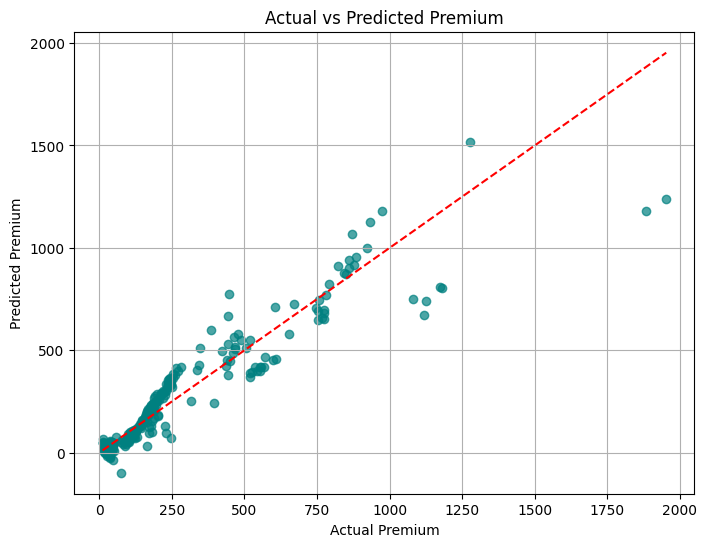

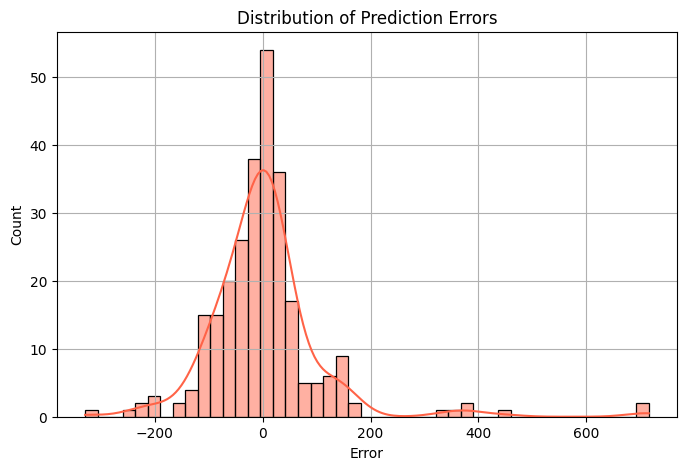

In [11]:
#  نمودار: مقایسه مقدار واقعی و پیش‌بینی‌شده
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Actual vs Predicted Premium')
plt.grid(True)
plt.show()

#  نمودار: خطای پیش‌بینی
errors = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(errors, kde=True, color='tomato')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.grid(True)
plt.show()

# 📊 Regression Model Evaluation Report

###  Model: Linear Regression

#### 📈 Performance Metrics

| Metric | Value |
|--------|-------|
| Mean Absolute Error (MAE) | **63.69** |
| Mean Squared Error (MSE)  | **11771.23** |
| Root Mean Squared Error (RMSE) | **108.50** |
| R² Score | **0.87** |

---

###  Technical Interpretation

- **MAE (63.69)**: On average, the model’s predictions deviate from the actual insurance premium by about 64 units.
- **MSE (11771.23)**: The squared error metric penalizes larger errors more heavily.
- **RMSE (108.50)**: Indicates a standard deviation of prediction errors in the same unit as the target.
- **R² Score (0.87)**: The model explains 87% of the variance in the data, showing strong predictive power.

---

###  Business Use Cases

- Estimating insurance premiums for new clients.
- Identifying key factors affecting insurance costs (e.g., smoking, age, region).
- Informing marketing, risk management, or pricing strategy.



# Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 4.98
MSE: 797.79
RMSE: 28.25
R²: 0.99


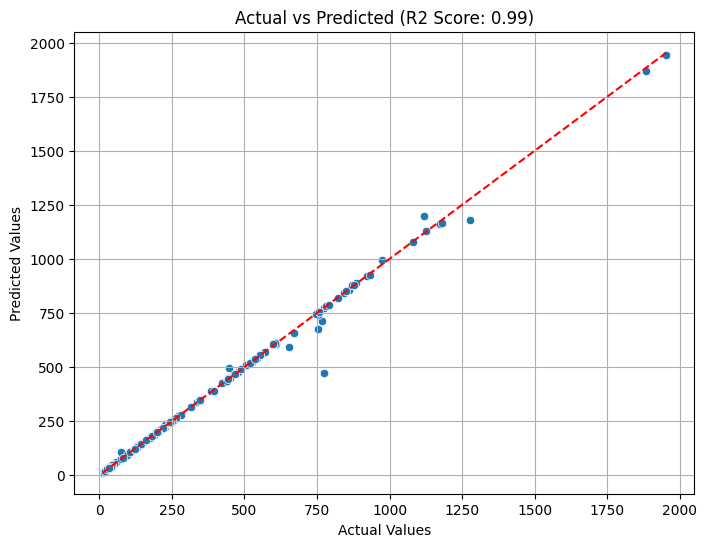

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (R2 Score: {r2_score(y_test, y_pred):.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # خط ایده‌آل
plt.grid(True)
plt.show()


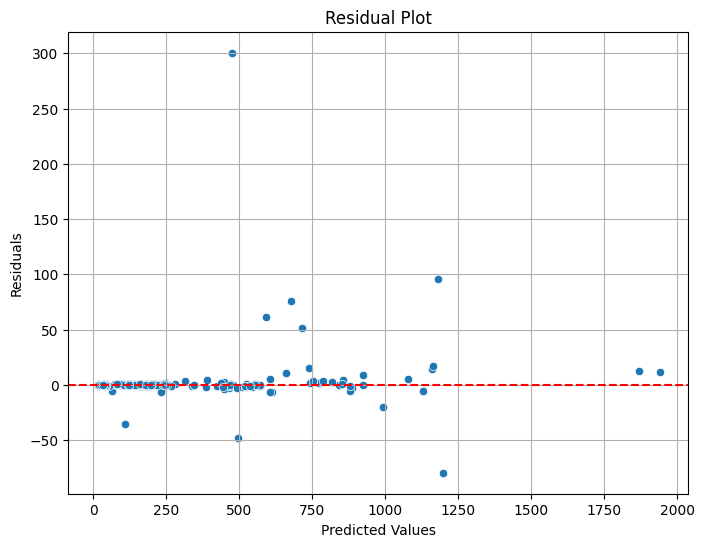

In [28]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


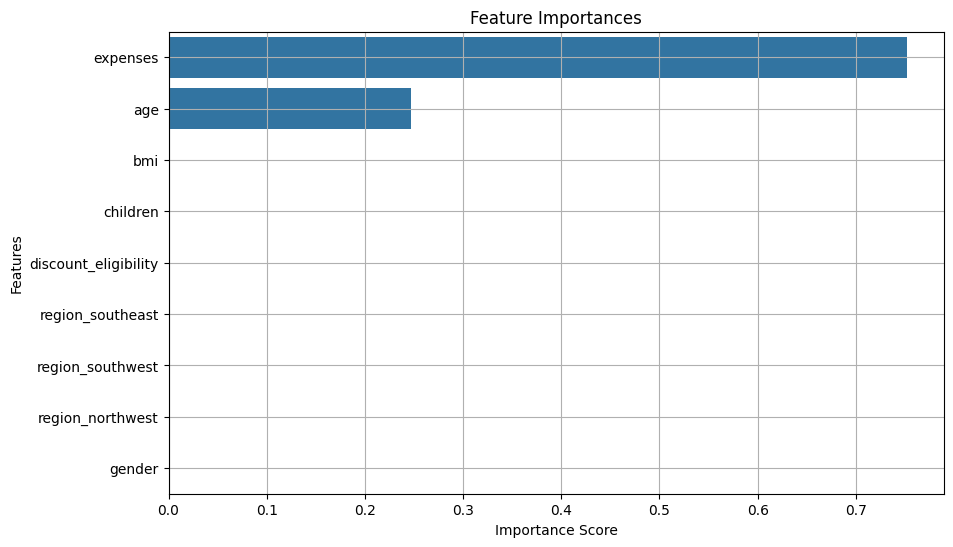

In [29]:
import pandas as pd
import numpy as np

# فرض: X_train یک DataFrame است
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()


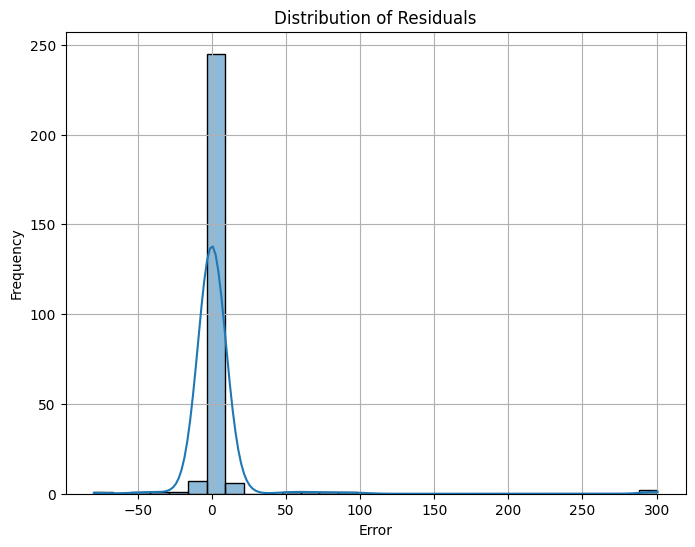

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



# 📊 Regression Model Evaluation Report

### Model: Random Forest Regression

####  Performance Metrics

| Metric                   | Value   |
|--------------------------|---------|
| Mean Absolute Error (MAE) | **4.98**  |
| Mean Squared Error (MSE)  | **797.79** |
| Root Mean Squared Error (RMSE) | **28.25** |
| R² Score                 | **0.99**  |

---

### Technical Interpretation

- **MAE (4.98):** On average, the model’s predictions deviate from the actual values by about 5 units, indicating very high accuracy.
- **MSE (797.79):** The low squared error shows small and consistent prediction errors.
- **RMSE (28.25):** Represents the standard deviation of prediction errors, confirming the model’s precise predictions.
- **R² Score (0.99):** The model explains 99% of the variance in the data, demonstrating excellent predictive power.

---

### Business Use Cases

- Accurately estimating insurance premiums for new clients with high confidence.
- Better identification and analysis of key factors affecting insurance costs.
- Enhancing marketing, risk management, and pricing strategies with more reliable predictions.


# 📊 Comparative Regression Model Evaluation Report

## Models Compared:
- **Linear Regression**
- **Random Forest Regression**

---

###  Performance Metrics Comparison

| Metric                   | Linear Regression       | Random Forest Regression | Improvement Factor*      |
|--------------------------|-------------------------|--------------------------|-------------------------|
| Mean Absolute Error (MAE) | 63.69                   | 4.98                     | 12.79× lower             |
| Mean Squared Error (MSE)  | 11,771.23               | 797.79                   | 14.76× lower             |
| Root Mean Squared Error (RMSE) | 108.50              | 28.25                    | 3.84× lower              |
| R² Score                 | 0.87                    | 0.99                     | 13.8% higher             |

*Improvement Factor indicates how many times the Random Forest model outperforms Linear Regression in reducing error.

---

###  Visual Summary (Conceptual)

```plaintext
Metric          | Linear Regression | Random Forest
--------------------------------------------------
MAE             | ████████████████  | █
MSE             | ████████████████████████████████ | █
RMSE            | ███████████       | ███
R² Score        | ██████████        | ██████████████


### Detailed Interpretation

**Mean Absolute Error (MAE):**  
The Random Forest Regression model reduces average absolute prediction error to only about 5 units compared to ~64 units for Linear Regression, implying much finer accuracy in predictions.

**Mean Squared Error (MSE):**  
The squared error, which penalizes large deviations, is drastically lower for the Random Forest model, highlighting its robustness against outliers and extreme prediction errors.

**Root Mean Squared Error (RMSE):**  
This value, in the same units as the target variable, confirms that prediction deviations are significantly less for the Random Forest model.

**R² Score:**  
While the Linear Regression model explains 87% of the variance in the data, the Random Forest model explains an exceptional 99%, signaling near-perfect fitting to the data patterns.

---

###  Business Implications

**Prediction Accuracy:**  
The Random Forest Regression model’s superior accuracy makes it highly reliable for estimating insurance premiums, minimizing risk in pricing strategies.

**Model Robustness:**  
Its lower sensitivity to outliers means better performance on diverse and complex datasets, useful in real-world insurance data scenarios.

**Strategic Decisions:**  
Enhanced predictive power facilitates more confident decision-making in marketing, underwriting, and risk management.

**Cost Efficiency:**  
Reduced prediction errors can lead to better customer satisfaction and decreased financial losses due to mispricing.

---

###  Conclusion

The Random Forest Regression model outperforms Linear Regression across all key metrics by a wide margin. For applications requiring high accuracy and reliability in insurance premium predictions, Random Forest Regression is the recommended choice.
